# 선형회귀와 선형분류 예
## 붓꽃 꽃받침 길이와 폭, 꽃잎 길이와 폭 데이터 사용 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets 
iris = datasets.load_iris() 
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

## sepal length 로 petal length를 예측하는 선형 모델

In [5]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

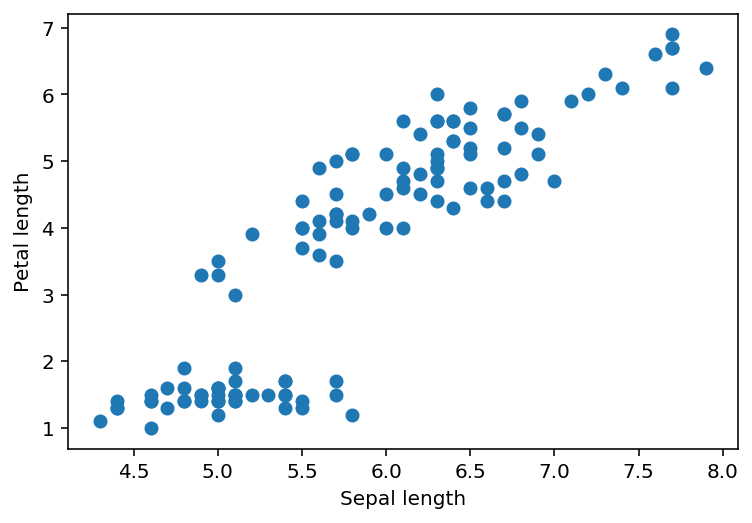

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

## 선형회귀 모델

In [7]:
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
print("Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))

Score : 0.655


In [8]:
print(linr.coef_) 
print(linr.intercept_)

[1.8699969]
-7.233315234253802


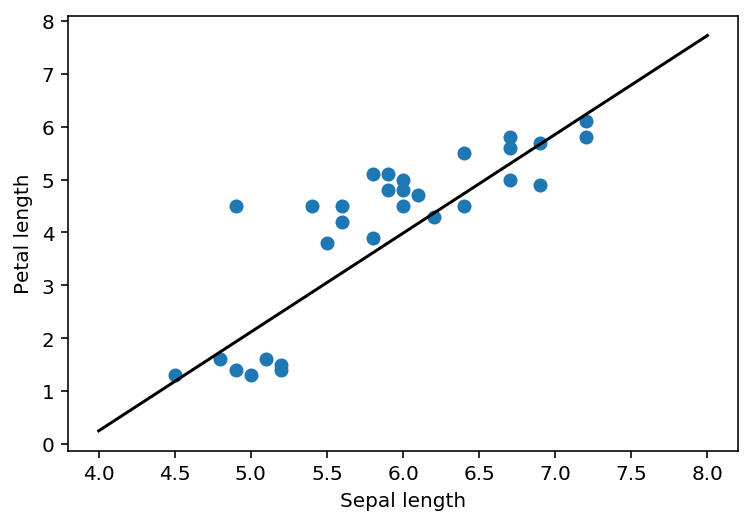

In [9]:
plt.scatter(X_test, y_test, marker='o') 
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

XX = np.linspace(4, 8, 3)
plt.plot(XX, linr.coef_ * XX + linr.intercept_, "k-")

## 이진 분류 문제

In [10]:
X, y = iris.data, iris.target
print(X.shape, type(X))# (150, 4) <class 'numpy.ndarray'>
print(y.shape, type(y))# (150,) <class 'numpy.ndarray'>

(150, 4) <class 'numpy.ndarray'>
(150,) <class 'numpy.ndarray'>


## sepal length와 sepal width를 사용하여 꽃을 분류

In [0]:
X2 = X[:, :2]

Text(0, 0.5, 'Sepal width')

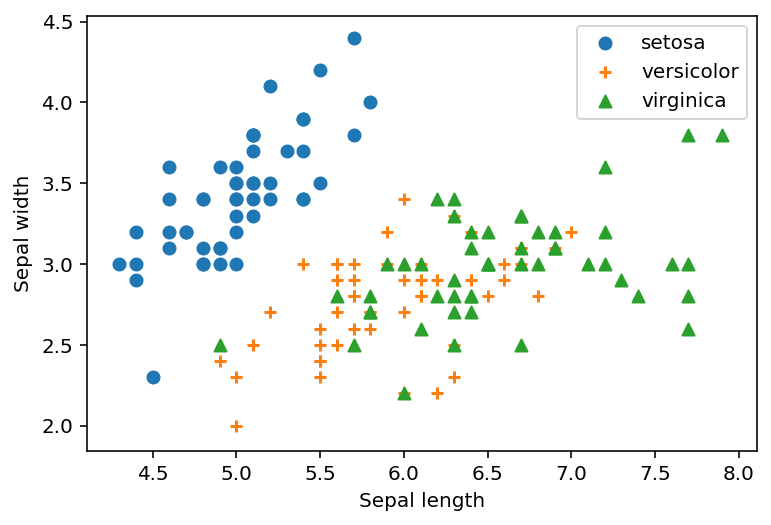

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

## 꽃을 두 종류로 이진분류 세토사와 세토사 아닌 것


In [13]:
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5)

In [15]:
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0, 0.5, 'Sepal width')

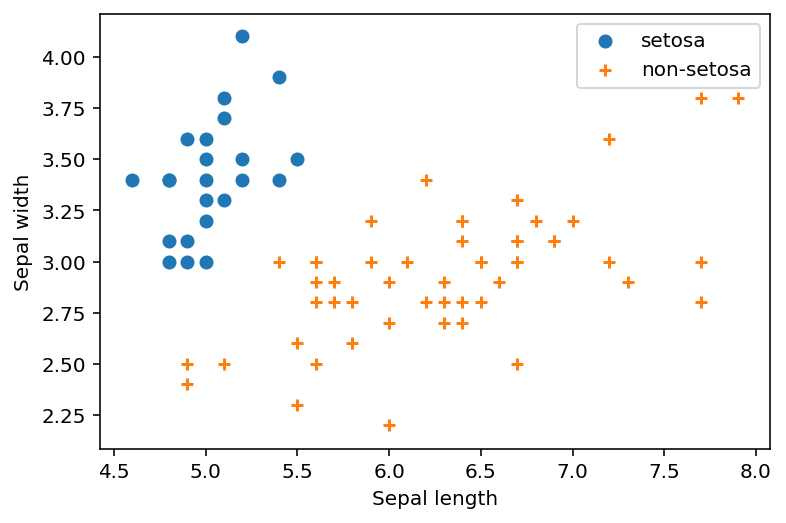

In [16]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [17]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
clf.coef_, clf.intercept_

(array([[  78.4623486 , -126.90889942]]), array([-25.18974849]))

In [19]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_
print(a, b, c)
## 103.189493433 –172.607879925 -35.2970136277

78.4623486045284 -126.90889942074729 [-25.18974849]


## 훈련 데이터에 대한 결정 경계

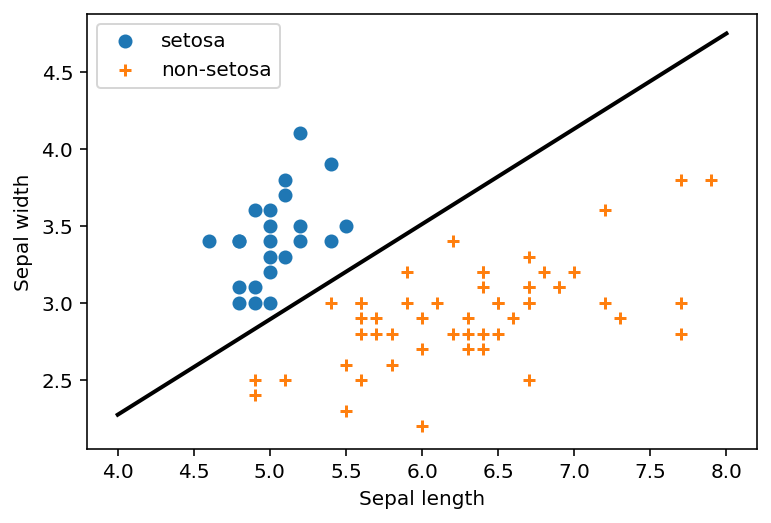

In [20]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(2):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

In [21]:
print(clf.predict([[4.5, 3.5]]))  # 0

[0]


In [22]:
print(clf.score(X2, y2))

0.9933333333333333


In [23]:
print(clf.score(X_test, y_test))

0.9866666666666667


## 테스트 데이터에 대한 결정 경계

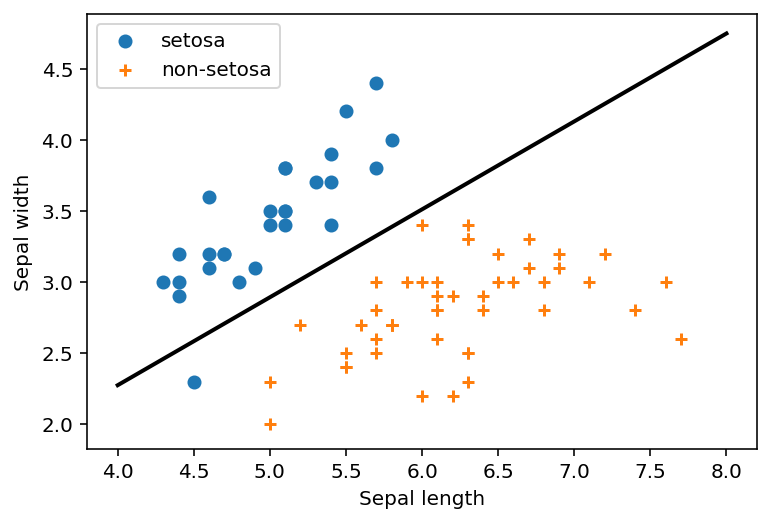

In [24]:
for i in range(2):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i])

binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

XX = np.linspace(4, 8, 40)
# 결정 경계선
plt.plot(XX, (-a/b)*XX - c/b, "k-", linewidth=2)

In [27]:
cv = KFold(5, shuffle=True)
print(cross_val_score(clf, X2, y2, cv=cv))

[1.         0.86666667 1.         1.         0.96666667]


## 4개 속성 모두 이용
### 세가지 꽃 구분

In [0]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_all = SGDClassifier(max_iter=1000)
clf_all.fit(X_train, y_train)

In [0]:
clf_all.score(X_test, y_test)

## 교차검증

In [0]:
cv = KFold(X.shape[0], 5,shuffle=True)
print(cross_val_score(clf_all, X, y, cv=cv))